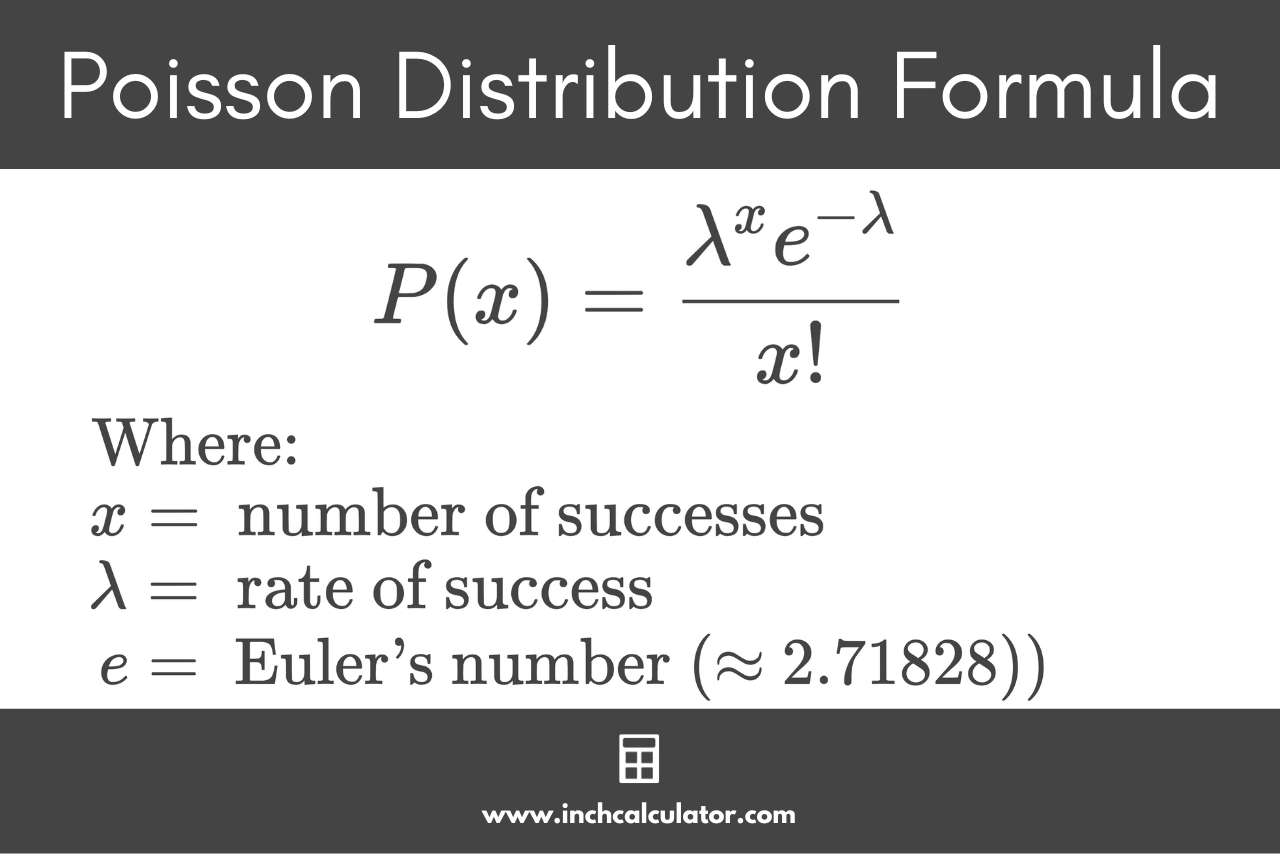

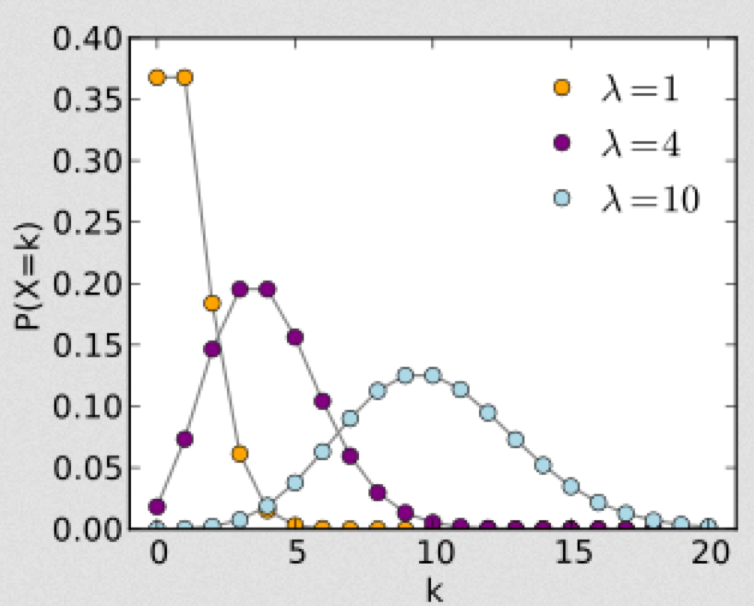


The goal here is to implement a "jump" process in the simulations generated by the ARIMA equation

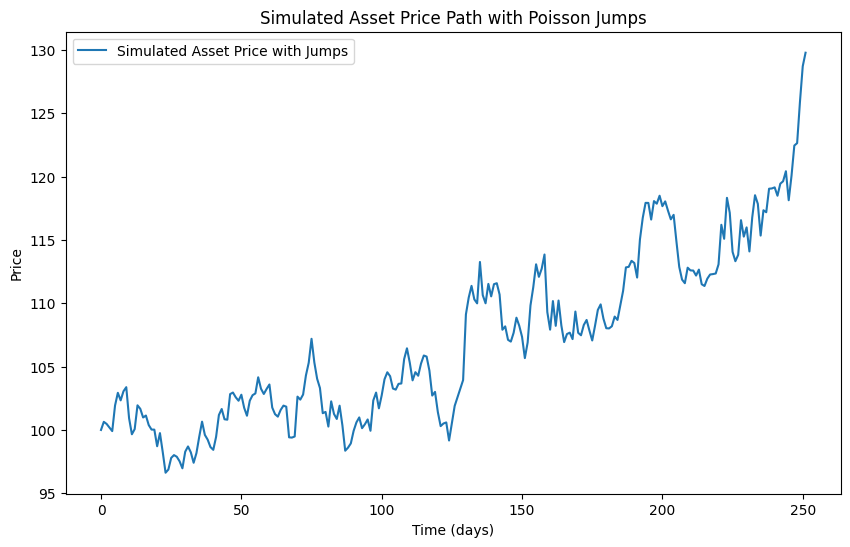

In [2]:
import numpy as np
import matplotlib.pyplot as plt
### Sample code of a poisson jump process:

# Define parameters
S0 = 100  # Initial stock price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
lambda_ = 0.1  # Jump intensity (average number of jumps per year)
mu_j = -0.2  # Mean of the jump size
sigma_j = 0.1  # Standard deviation of the jump size
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (1 trading day)
N = int(T / dt)  # Number of steps


# Seed for reproducibility
np.random.seed(42)

# Initialize price array
prices = np.zeros(N)
prices[0] = S0

# Simulate the asset price path
for t in range(1, N):
    # Generate the random components
    Z = np.random.normal(0, 1)
    J = np.random.normal(mu_j, sigma_j) if np.random.poisson(lambda_ * dt) > 0 else 0 # Jump component, you just add the J to the price if there is a jump

    # Calculate the price
    prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z + J)


# Plot the simulated price path
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Simulated Asset Price with Jumps')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.title('Simulated Asset Price Path with Poisson Jumps')
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd

#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

In [ ]:
import numpy as np
import pandas as pd
from numba import njit

@njit(fastmath = True) #we use the njit decorator to speed up the function
def GenerateSimulation(data, plot= False):
    yt = np.zeros(len(data))
    yt[0] = data[0]
    error_terms = np.zeros(len(data))
    sigma2 = 2.956406656496939e-08
    sigma = np.sqrt(sigma2)
    error_terms[0] = np.random.normal(0, sigma)
    intercept = -5.398901140173307e-08
    
    for i in range(1,len(yt)):
        error_terms[i] = np.random.normal(0, sigma)
        yt[i] = yt[i-1] + intercept  + error_terms[i] + -0.1042188993634203 * error_terms[i-1] + -0.029764115450367442 * error_terms[i-2] + -0.002917953581047072 * error_terms[i-3] + 0.004290940137585559 * error_terms[i-4] + -0.012028812812397361 * error_terms[i-5]

    return yt

simulated_data = GenerateSimulation(close)
import matplotlib.pyplot as plt
plt.plot(simulated_data)
plt.title("Simulated data with ARIMA(0,1,5)")
plt.show()

In [ ]:
### Now I need to simulate thousands of time series based on that model; I will use the same error terms for all of them
@njit(fastmath = True) #we use the njit decorator to speed up the function
def ThousandSimulations(data, number_simulations):
    simulated_series_matrix = np.zeros((len(data), number_simulations))
    for i in range(number_simulations):
        simulated_series_matrix[:,i] = GenerateSimulation(data)

    return simulated_series_matrix